## Raod Map

We want to:

- [x] plot the ACFs for each **ensAvg** **property** individually as a **subplot** in a **space** **figure**
- [ ] make the ACF plotters more efficient.


## General Settings

### Importing packages

In [1]:
# Importing necessary packages:

from glob import glob
import numpy as np
import pandas as pd

import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from polyphys.visualize import plotter
from polyphys.visualize import tuner
from polyphys.manage.parser import SumRule, TransFoci
from polyphys.manage import organizer
from polyphys.analyze import measurer
from polyphys.manage import utilizer

# Project details

project_details ={
    'SumRule':{
        'parser': SumRule,
        'space_pat': 'N*D*ac*',
        'hierarchy': 'N*',
        'space_hierarchy': 'N*',
        'attributes': ['space', 'ensemble_long', 'ensemble', 'nmon', 'dcyl',
                       'dcrowd','phi_c_bulk'
                      ],
        'time_varying_props': [ 'asphericityTMon', 'fsdTMon', 'gyrTMon',
                               'rfloryTMon','shapeTMon'],
        'equil_measures': [np.mean, np.var, measurer.sem],
        'equil_attributes': ['space', 'ensemble_long', 'ensemble', 'nmon',
                             'dcyl','dcrowd', 'phi_c_bulk',
                             'phi_c_bulk_round'
                            ],
        'equil_properties': ['asphericityMon-mean', 'asphericityMon-var',
                             'asphericityMon-sem', 'fsdMon-mean',
                             'fsdMon-var', 'fsdMon-sem', 'gyrMon-mean',
                             'gyrMon-var', 'gyrMon-sem', 'rfloryMon-mean',
                             'rfloryMon-var', 'rfloryMon-sem',
                             'shapeMon-mean', 'shapeMon-var', 'shapeMon-sem']
    },
    'TransFoci':{
        'parser': TransFoci,
        'space_pat': 'ns*nl*al*D*ac*',
        'hierarchy': 'eps*',
        'space_hierarchy': 'ns*',
        'attributes': ['space', 'ensemble_long', 'ensemble', 'nmon_small',
                       'nmon_large','dmon_large', 'dcyl', 'dcrowd',
                       'phi_c_bulk'
                      ],
        'time_varying_props': ['asphericityTMon', 'fsdTMon', 'gyrTMon',
                               'shapeTMon'],
        'equil_measures': [np.mean, np.var, measurer.sem],
        'equil_attributes': ['ensemble_long', 'ensemble', 'space', 'dcyl',
                             'dmon_large', 'nmon_large', 'nmon_small',
                             'dcrowd', 'phi_c_bulk', 'phi_c_bulk_round'],
        'equil_properties': ['asphericityMon-mean', 'asphericityMon-var',
                             'asphericityMon-sem', 'fsdMon-mean',
                             'fsdMon-var', 'fsdMon-sem', 'gyrMon-mean',
                             'gyrMon-var', 'gyrMon-sem', 'shapeMon-mean',
                             'shapeMon-var', 'shapeMon-sem']
    }
}

norm_props_specs =  {
    'SumRule': {
        'rfloryMon-norm': {
            'name': 'Flory radius',
            'symbol': r'$\frac{R_F(\phi_c)}{R_{F,0}}$',
            'color': 'firebrick'
        },
        'gyrMon-norm': {
            'name': 'Radius of gyration',
            'symbol': r'$\frac{R_g(\phi_c)}{R_{g,0}}$',
            'color':'steelblue'
        },
        'fsdMon-norm': {
            'name': 'Furthermost distance',
            'symbol': r'$\frac{\fract{L(\phi_c)}{L_{0}}$',
            'color': 'forestgreen'
        },
        'asphericityMon-norm': {
            'name': 'Asphericity',
            'symbol': r'$\frac{\Delta(\phi_c)}{\Delta_{0}}$',
            'color': 'goldenrod'
        },
        'shapeMon-norm': {
            'name': 'Shape parameter',
            'symbol': r'$\frac{S(\phi_c)}{S_{0}}$',
            'color': 'orchid'
        }
    },
    'TransFoci':{
        'gyrMon-norm': {
            'name': 'Radius of gyration',
            'symbol': r'$\frac{R_g(\phi_c)}{R_{g,0}}$',
            'color':'steelblue'
        },
        'fsdMon-norm': {
            'name': 'Furthermost distance',
            'symbol': r'$\frac{L(\phi_c)}{L_{0}}$',
            'color': 'forestgreen'
        },
        'asphericityMon-norm': {
            'name': 'Asphericity',
            'symbol': r'$\frac{\Delta(\phi_c)}{\Delta_{0}}$',
            'color': 'goldenrod'
        },
        'shapeMon-norm': {
            'name': 'Shape parameter',
            'symbol': r'$\frac{S(\phi_c)}{S_{0}}$',
            'color': 'orchid'
        },
        'bondsHistFoci-norm': {
            'name': 'Probability distribution function of direct bonds',
            'symbol': r'$\mathcal{P}(x_b)$',
            'color': 'orchid'
        },
        'clustersHistFoci-norm': {
            'name': 'Probability distribution function of clusters',
            'symbol': r'$\mathcal{P}(x_c)$',
            'color': 'orchid'
        },
        'pairDistHistFoci': {
            'name': 'Frequency distribution of pair distance',
            'symbol': r'$\mathcal{H}(r)$',
            'color': 'orchid'
        },
        'pairDistRdfFoci': {
            'name': 'Radial distribution function of pair distance',
            'symbol': r'$\mathcal{P}(r)$',
            'color': 'orchid'
        },
        'pairDistTFoci': {
            'name': 'Pair distance',
            'symbol': r'$r(t)$',
            'color': 'orchid'
        }
    }
}

attr_labels = {
    "phi_c_bulk_round": "$\phi_c$",
    "time": "$\hat{{t}}$",
    "lags": "$\hat{t}_{lags}$",
    "dmon_large": "$a_l$",
    "dcrowd": "$a_c$",
    "dcyl": "$D$",
    "nmon_small": "$n_s$",
    "nmon_large": "$n_l$",
    'phi_c_bulk_norm': "${a\phi_c}/{a_c}$"
}

# loading databases:
#analysis_db = '/Users/amirhsi_mini/research_data/analysis/'
analysis_db = '/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets'
project = 'TransFoci'
phase='ensAvg'
geometry='biaxial'
group = "bug"
species = "Mon"
space_dbs = glob(analysis_db + project_details[project]['space_pat'])

# Auto-correlation functions

##### Note: In a given space, ensAvg groups differs in their values of bulk volume fraction of crowders (column name: phi_c_bulk)

### Theoretical background:

Below, all the several definitions of autocorrelation function (acf) in the literature are listed. Assuming $A(t)$ is a discrete time-varying property of interest and is collected every $M$ timesteps in a molecular dynamics simulation with the time step $\Delta t$ and time unit $\hat{t}$. First, we define the mean (or average) and unbiased variance of $A(t)$ as what follows

$$\langle A\rangle=\frac{1}{t_{max}}\sum_{t=1}^{t_{max}}A(t)$$
$$\sigma^2_A=\langle A^2 \rangle-\langle A\rangle^2=\frac{1}{t_{max}-1}\sum_{t=1}^{t_{max}}(A(t)-\langle A\rangle)^2$$

where $t_{max}$ is the total number of collected cofigurations or timesteps, or simply the size of $A(t)$, implying the total number of simulated timesteps is $t_{max}\times M$. Given this definition, the acf has been defined in the following ways in the literature:

1. Allen and Tildesley define the *non-normalized* acf in "Computer simulation of liquids - 2017" as

$$c_{AA}(h) = \frac{1}{h_{max}}\sum_{h_0=1}^{h_{max}}A(h_0)A(h_0+h)$$

where $h_{max}=\frac{t_{max}-1}{h}$

2. *1989 - Murat M Greet GS - Structure of a Grafted Polymer Brush A Molecular Dynamics Simulation* defines the acf in "Structure of a Grafted Polymer Brush A Molecular Dynamics Simulation - 1989" as

$$c_{AA}(h) =\frac{\langle (A(h)-\langle A \rangle)(A(0)-\langle A \rangle)\rangle}{\sigma^2_A}=\frac{\langle A(h)A(0)\rangle-\langle A \rangle \langle A(0) \rangle}{\sigma^2_A}$$

See the rest of this artciel to see how correlation time is calculated. See the rest of this artciel to see how correlation time is calculated.

3. In *1989 - Grest GS Kremer K Witten TA et el - Relaxation of Self-Entangled Many-Arm Star Polymers, 1987 - Grest GS Kremer K Witten TA - Structure of Many-Arm Star Polymers A Molecular Dynamics Simulation, and 1977 - Kranbuehl DE Verdier PH - Relaxation of the aspherical shapes of random-coil polymer chains*, the acf is

$$c_{AA}(h) =\frac{\langle A(h)A(0)\rangle-\langle A \rangle^2}{\sigma^2_A}$$

where the average is performed over the initial time steps $h=h_0=0$ taken every $K$ timesteps. Kranbuehl and Verdier runs the whole simulation several times the relaxation time of the end-to-end length.

4. In *1978 - Rapaport DC - Molecular dynamics simulation of polymer chains with excluded volum, and 1979 - Bishop M Ceperley D Frisch HL - Molecular dynamics of polymeric systems* the afc is given by

$$c_{AA}(h) =\frac{\langle A(h)A(h_0+h)\rangle-\langle A(h_0) \rangle^2}{\sigma^2_A(h_0)}$$

where

$$\sigma^2_A(h_0)=\langle A(h_0)^2 \rangle-\langle A(h_0)\rangle^2$$

The averaging should be done over ensembles; however, in practice, the ensemble average is replaced by the time average provided that the timesteps or time interval between successvie $h_0$ values are sufficently lagre so the configurations are uncorrelated.

5. *1981 - Bruns W Bansal R - Molecular dynamics study of a single polymer chain in solution* defines the afc as

$$c_{\vec{A}\vec{A}}(h) = \frac{\sum_{h_0=1}^{t_{max}-h}\vec{A}(h_0).\vec{A}(h_0+h)}{\sum_{h_0=1}^{t_{max}-h}\vec{A}^2(h_0)}$$

where $\vec{A}$ is a vector quantity and $h_0$ is summed over $1,1+p,1+2p,\dots$ instead of $h_0=1,2,3,\dots,t_{max}-h$. For a scalar quantity, this definition is used:

$$c_{AA}(h) = \frac{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A(h_0)A(h_0+h)-\sum_{h_0=1}^{t_{max}-h}A(h_0)\sum_{h_0=1}^{t_{max}-h}A(h_0+h)}{\sqrt{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A^2(h_0)-[\sum_{h_0=1}^{t_{max}-h}A^2(h_0)]^2}-\sqrt{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A^2(h_0+h)-[\sum_{h_0=1}^{t_{max}-h}A^2(h_0+h)]^2}}=
\frac{\langle A(h_0)A(h_0+h)\rangle-\langle A(h_0)\rangle\langle A(h_0+h)\rangle}{\sqrt{\langle A^2(h_0)\rangle-\langle A(h_0)\rangle^2}-\sqrt{\langle A^2(h_0+h)\rangle-\langle A(h_0+h)\rangle^2}}$$

6. *Brockwell PJ Davis RA - 2016 - Introduction to Time Series and Forecasting* defines the afc in the following way

$$c_{AA}(h) = \frac{cov_{A}(h)}{\sigma_A^2} = \frac{1}{\sigma_A^2}\frac{1}{t_{max}}\sum_{h_0=1}^{t_{max}-h} [A(h_0+h)-\langle A\rangle][A(h_0)-\langle A\rangle]$$





### How to run this Notebook:

1. Check ((spaces_to_read**
2. Check **group** and **species**.
3. check **database**.
4. delete extra **physical** properties based on the preoject.
5. check **nlags** and **ticks**.
6. check **parser** and **spaces_title**.


### Grouping and filtering

Since the datasets we work with are large, it is a good idea to
- define some filters to ease subsetting the dataframes.
- define distinguishable colors for the volume fraction of crowders as the changing parameter that defines different ensAvg groups in a space
- round the value of this changing parameter.

In [ ]:
# read data
acf_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('acf.parquet.brotli')
                ]
acf = [pd.read_parquet(space_db) for space_db in acf_space_dbs]
acf = pd.concat(acf,axis=0, ignore_index=True)
acf.reset_index(inplace=True,drop=True)

# a sorted list of unique spaces in the dataset
spaces = acf.loc[:,'space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)

# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
acf['phi_c_bulk_round'] = acf['phi_c_bulk'].apply(
    utilizer.round_up_nearest, args=[divisor, round_to]
)
# phi_c to drop
acf = acf.loc[~acf['phi_c_bulk_round'].isin([0.025, 0.05, 0.075, 0.125, 0.175]),:]
acf.reset_index(inplace=True, drop=True)
# setting colors for unique crd_c
phi_crds = acf.loc[:,'phi_c_bulk_round'].unique()
phi_crds.sort()
flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
flare_cmap_cut = tuner.truncated_colormap(flar_cmap,  min_value=0.0, max_value=1.0, ncolors=200)
mpl.cm.register_cmap("flare_cmap_cut", flare_cmap_cut)
phi_colors = sns.color_palette("flare_cmap_cut", len(phi_crds))#,as_cmap=True)
# add rounded phi_crds to the dataset
# Define a list of unique physical properties:
properties = [property_ for property_ in acf.columns if '-mean' in property_]
properties.sort()
# Define unique specifications for each physical property:
acf_props_specs =  {
    'SumRule': {
        'rfloryTMon': {
            'name': 'Flory radius',
            'symbol': r'$C_{R_FR_F}(\hat{t}_{lags})$',
            'color': 'firebrick'
        },
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$C_{R_gR_g}(\hat{t}_{lags})$',
            'color':'steelblue'
                   },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$C_{LL}(\hat{t}_{lags})$',
            'color': 'forestgreen'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$C_{\Delta\Delta}(\hat{t}_{lags})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$C_{SS}(\hat{t}_{lags})$',
            'color': 'orchid'
        }
    },
    'TransFoci': {
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$C_{R_gR_g}(\hat{t}_{lags})$',
            'color':'steelblue'
                   },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$C_{LL}(\hat{t}_{lags})$',
            'color': 'forestgreen'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$C_{\Delta\Delta}(\hat{t}_{lags})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$C_{SS}(\hat{t}_{lags})$',
            'color': 'orchid'
        }
    }
}
acf_props_specs_project = acf_props_specs[project]
space_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    space_title_style = {
        'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    space_titles[space] = space_title_style[project]

### Some explorations:

In [ ]:
acf.head()

In [ ]:
acf.columns

In [ ]:
acf.info()

### ACF with CIs for all the physical properties per space columns wrapped with $\phi_c^{bulk}$

In [ ]:
nlags=7000
ticks = int(nlags/7)
for space in spaces:
    space_acf = acf[acf.space==space]
    plotter.p_acf_with_ci_space(
        space_acf,
        space,
        space_titles[space],
        project,
        properties=acf_props_specs_project,
        ncols=3,
        xlimits=(0, nlags, ticks),
        ylimits=(-0.25, 1, 0.25),
        lags=nlags,
        dpi=100,
        fontsize=18
    )

### ACF of each physical property in a project collored with an attribute

In [ ]:
#property_= 'gyrTMon'
legend_anchor = (1.1,1.02)
nrows = len(spaces)
for property_ in acf_props_specs_project.keys():
    plotter.p_acf_allInOne_project(
        acf,
        project,
        space_titles,
        property_,
        acf_props_specs_project[property_],
        phi_crds,
        phi_colors,
        xlimits=(0, nlags, ticks),
        nrows=nrows,
        ncols=1,
        legend_anchor=legend_anchor,
        lags=nlags
    )

# Chain size plots

### Grouping and filtering

Since the datasets we work with are large, it is a good idea to
- define some filters to ease subsetting the dataframes.
- define distinguishable colors for the volume fraction of crowders as the changing parameter that defines different ensAvg groups in a space
- round the value of this changing parameter.

In [ ]:
chainsize_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('chainSize.parquet.brotli')
                      ]
chainsize = [pd.read_parquet(space_db) for space_db in chainsize_space_dbs]
chainsize = pd.concat(chainsize,axis=0, ignore_index=True)
chainsize.reset_index(inplace=True,drop=True)
print(chainsize.columns)
# droping some of the columns
cols_to_drop = {
    'SumRule': ['asphericityTMon-var', 'asphericityTMon-sem', 'fsdTMon-var',
                'fsdTMon-sem', 'gyrTMon-var', 'gyrTMon-sem', 'rfloryTMon-var',
                'rfloryTMon-sem', 'shapeTMon-var', 'shapeTMon-sem'],
    'TransFoci': ['asphericityTMon-var', 'asphericityTMon-sem', 'fsdTMon-var',
                  'fsdTMon-sem', 'gyrTMon-var', 'gyrTMon-sem',
                  'shapeTMon-var','shapeTMon-sem']
}
chainsize.drop(columns=cols_to_drop[project],inplace=True)
# a sorted list of unique spaces in the dataset
spaces = chainsize.loc[:,'space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
chainsize['phi_c_bulk_round'] = chainsize['phi_c_bulk'].apply(
    utilizer.round_up_nearest, args=[divisor, round_to]
)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize = chainsize.loc[~chainsize['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize.reset_index(inplace=True, drop=True)
# add rounded phi_crds to the dataset
# Define a list of unique physical properties:
ext = '-mean'
properties = [
    prop_.split(ext)[0] for prop_ in chainsize.columns if prop_.endswith(ext)
]
properties.sort()
# change the name of cols after fining properties based on "mean" in their name
new_columns = [prop.split(ext)[0] for prop in chainsize.columns]
chainsize.columns = new_columns
# Define unique specifications for each physical property:
chainsize_props_specs =  {
    'SumRule': {
        'rfloryTMon': {
            'name': 'Flory radius',
            'symbol': r'$R_F(\hat{t})$',
            'color': 'firebrick'
        },
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L(\hat{t})$',
            'color': 'forestgreen'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        }
    },
    'TransFoci':{
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L(\hat{t})$',
            'color': 'forestgreen'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        }
    }
}
chainsize_props_specs_project = chainsize_props_specs[project]
space_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    space_title_style = {
        'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    space_titles[space] = space_title_style[project]

### Some explorations:

In [ ]:
chainsize.head()

In [ ]:
chainsize.columns

In [ ]:
chainsize.info()

### Time series per physical properties per space with an attribute for hues and cols

In [ ]:
hue_attr = 'phi_c_bulk_round'
col_attr = 'phi_c_bulk_round'
x_prop = 'time'
fig_title_kw = {'x': 0.5, 'y': 1.02}
for space in spaces:
    chainsize_space = chainsize.loc[chainsize['space']==space]
    for property_ in properties:
        plotter.p_tseries_space(
            property_,
            hue_attr,
            col_attr,
            chainsize_space,
            space,
            space_titles[space],
            project,
            chainsize_props_specs_project,
            attr_labels,
            x_property= 'time',
            fig_title_kw = fig_title_kw,
            col_wrap= 3
        )

In [ ]:
for space, property_ in itertools.product(spaces, properties):
    chainsize_space = chainsize.loc[chainsize['space']==space]
    plotter.p_tseries_space(
        property_,
        hue_attr,
        col_attr,
        chainsize_space,
        space,
        space_titles[space],
        project,
        chainsize_props_specs_project,
        attr_labels,
        plot_context='talk',
        x_property= 'time',
        fig_title_kw = fig_title_kw,
        col_wrap= 3
    )

### Time series of each property per porject colored by space col wrapped by attribute

In [ ]:
x_prop = 'time'
font_scale = 2

# Below definition depends on how organize input paramaters in a project
project_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

col_attr = 'phi_c_bulk_round'
hue_attr = 'dmon_large'
col_wrap = 3
height = 5
aspect = 1.5 * 1.618 # golden ratio
color_palette='colorblind'
fig_title_kw = {'x': 0.5, 'y': 0.98}
for y_prop in properties:
    plotter.p_tseries_allInOne_space(
        chainsize,
        project,
        project_titles[project],
        x_prop,
        y_prop,
        hue_attr,
        col_attr,
        chainsize_props_specs_project,
        attr_labels,
        plot_context='talk',
        fig_title_kw=fig_title_kw,
        font_scale=font_scale,
        height=height,
        aspect=aspect,
        col_wrap=col_wrap,
        color_palette=color_palette
    )

col_attr = 'dmon_large'
hue_attr = 'phi_c_bulk_round'
col_wrap = 1
height = 5
aspect = 2 * 1.618 # golden ratio
color_palette='rocket_r'
fig_title_kw = {'x': 0.5, 'y': 0.96}
for y_prop in properties:
    plotter.p_tseries_allInOne_space(
        chainsize,
        project,
        project_titles[project],
        x_prop,
        y_prop,
        hue_attr,
        col_attr,
        chainsize_props_specs_project,
        attr_labels,
        fig_title_kw=fig_title_kw,
        font_scale=font_scale,
        height=height,
        aspect=aspect,
        col_wrap=col_wrap,
        color_palette=color_palette
    )

# Equilbrium size-related measures

#### Equilibrium chain-size measures

In [ ]:
species = 'Mon'
#allInOne_db = '/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets/' # mac-mini
allInOne_db = '/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets/' # macbook-pro
equil_db = '-'.join(
    ['allInOne', project, group, species, 'equilProps', phase]
)
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize_equil = \
    chainsize_equil.loc[
        ~chainsize_equil['phi_c_bulk_round'].isin(phi_c_to_drop),:
    ]
chainsize_equil.reset_index(inplace=True, drop=True)
# selecting 'norm' measures of properties
norm_props = [prop for prop in chainsize_equil.columns if prop.endswith('-norm')]
attributes = project_details[project]['equil_attributes']
selected_cols = attributes + norm_props
# melting properties columns
chainsize_melted = chainsize_equil[selected_cols].melt(
    id_vars=attributes,
    value_vars=norm_props
)
# dictionary of normalizer properties' features
project_titles = {}
spaces = chainsize_equil['space'].unique()
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

In [ ]:
x_prop = 'phi_c_bulk_round'
y_prop = 'value'
hue_attr = 'dmon_large'
col_attr = 'variable'
col_wrap = 2
marker = 'o'
save_to = './'
ext = 'eps'
color_palette = 'colorblind'
plot_context = 'talk'
font_scale = 2.2
height = 6
aspect = 1.618
ylabel_pad = 50
rc_params= {
    'mathtext.default': 'regular',
    'text.usetex': True
}
facet_kws = {
        'sharey': False,
        'sharex': True,
        'legend_out': True
        }
fig_title_kws = {'x': 0.5, 'y': 0.91}
loc='lower left'
font_family = ''
move_legend_kws = {'ncol': 1, 'bbox_to_anchor': (0.12, 0.15)}
tseries_grid = plotter.p_equil_allInOne_project(
    chainsize_melted,
    project_titles[project],
    x_prop,
    y_prop,
    hue_attr,
    col_attr,
    marker,
    norm_props_specs[project],
    attr_labels,
    font_scale=font_scale,
    plot_context=plot_context,
    col_wrap=col_wrap,
    height=height,
    aspect=aspect,
    color_palette=color_palette,
    facet_kws=facet_kws,
    ylabel_pad=ylabel_pad,
    fillstyle='none',
    markersize=10,
    markeredgecolor=None,
    fig_title_kws=fig_title_kws,
    loc=loc,
    move_legend_kws=move_legend_kws
)
tseries_grid.set(yticks=np.arange(0, 1.2, 0.2), xticks=np.arange(0,0.5,0.1))
output = "-".join(["equilPlot", project, 'chainMeasures', x_prop, hue_attr])
tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight', dpi=300)
plt.close()

### Clusters and Bonds

TypeError: seaborn.utils.move_legend() argument after ** must be a mapping, not NoneType

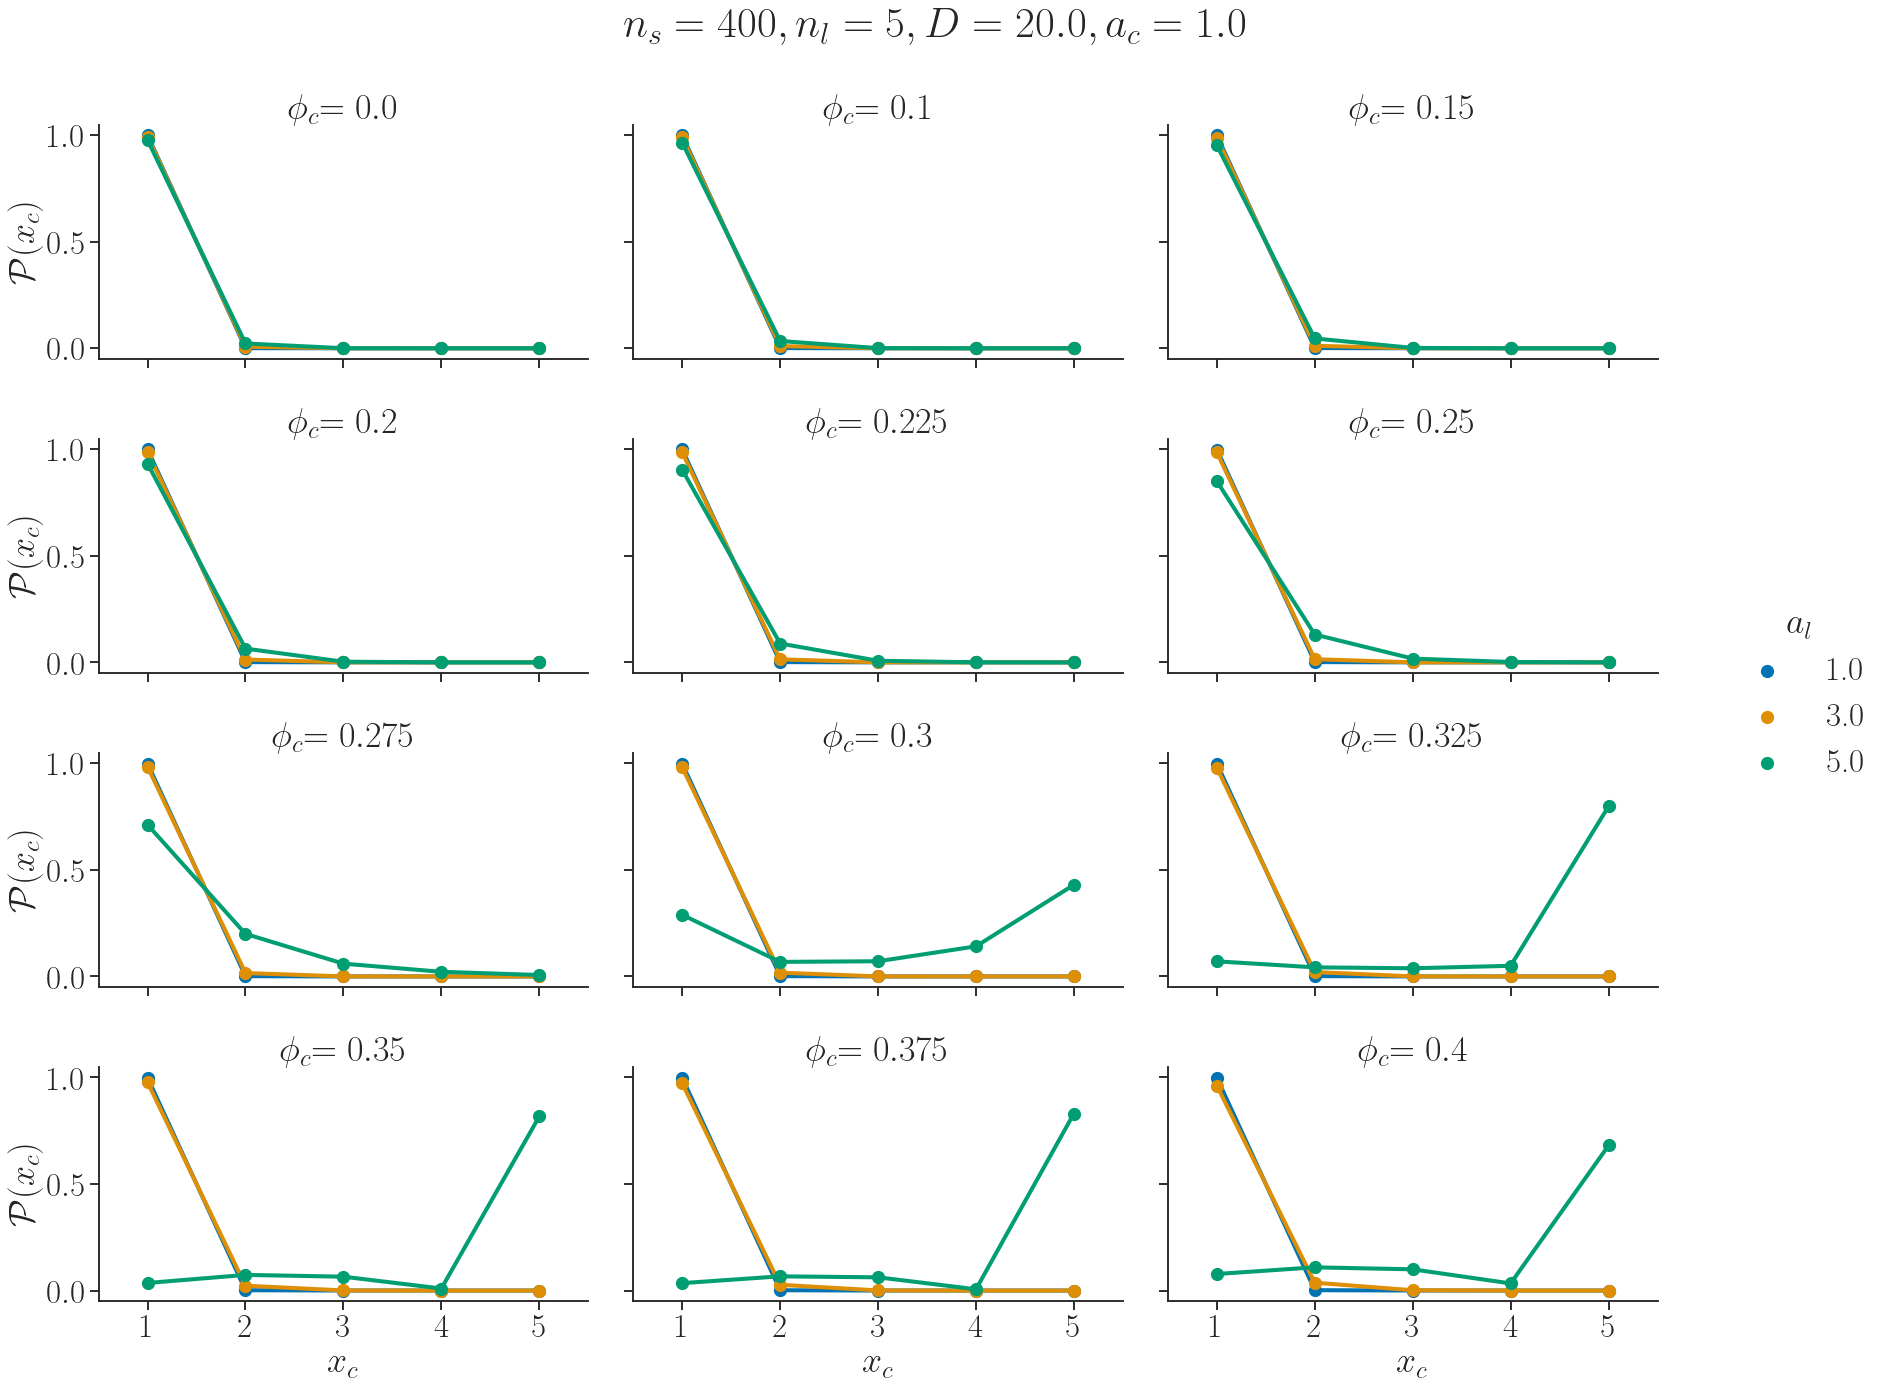

In [3]:
hist_properties = ['clustersHistFoci', 'bondsHistFoci']
species = 'Foci'
bin_center_labels = {
   'clustersHistFoci': '$x_c$',
   'bondsHistFoci': '$x_b$' 
}
save_to = './'
ext = 'pdf'
for prop in hist_properties:
    attr_labels['bin_center'] = bin_center_labels[prop]
    hist_df = '-'.join([project, group, species, prop + '.parquet.brotli'])
    hist_df = analysis_db + '/' + hist_df
    hist_df = pd.read_parquet(hist_df)
    # phi_c to drop
    phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
    hist_df = hist_df.loc[~hist_df['phi_c_bulk_round'].isin(phi_c_to_drop),:]
    hist_df.reset_index(inplace=True, drop=True)
    spaces = hist_df.loc[:,'space'].drop_duplicates().sort_values()
    spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
    project_titles = {}
    for space in spaces:
        s_info = project_details[project]['parser'](
            space,
            geometry=geometry,
            group=group,
            lineage='space',
            ispath=False
        )
        project_title_style = {
            'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
            'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
            }
        project_titles[project] = project_title_style[project]
    x_prop = 'bin_center'
    y_prop = prop + '-norm'
    rc_params= {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
    plot_context = 'talk'
    save_to = './'
    font_scale = 2
    
    # hue-col pair specific settings
    hue_attr = 'dmon_large'
    col_attr = 'phi_c_bulk_round'
    col_wrap = 3
    color_palette = 'colorblind'
    height = 5
    aspect = 1.618
    fig_title_kws = {'x': 0.5, 'y': 0.98}
    tseries_grid = plotter.p_hist_allInOne_project(
        hist_df,
        project_titles[project],
        x_prop,
        y_prop,
        hue_attr,
        col_attr,
        norm_props_specs[project],
        attr_labels,
        font_scale=font_scale,
        plot_context=plot_context,
        col_wrap=col_wrap,
        height=height,
        aspect=aspect,
        color_palette=color_palette,
        fig_title_kws=fig_title_kws
    )
    output = "-".join(['equilPlot', project, y_prop, x_prop, hue_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight', dpi=300)
    plt.close()
    # hue-col pair specific settings 
    hue_attr = 'phi_c_bulk_round'
    col_attr = 'dmon_large'
    col_wrap = 1
    color_palette = 'rocket_r'
    height = 6
    aspect = 1.618
    fig_title_kws = {'x': 0.5, 'y': 0.98}
    tseries_grid = plotter.p_hist_allInOne_project(
        hist_df,
        project_titles[project],
        x_prop,
        y_prop,
        hue_attr,
        col_attr,
        norm_props_specs[project],
        attr_labels,
        font_scale=font_scale,
        plot_context=plot_context,
        col_wrap=col_wrap,
        height=height,
        aspect=aspect,
        color_palette=color_palette,
        fig_title_kws=fig_title_kws
    )
    output = "-".join(['equilPlot', project, y_prop, x_prop, hue_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight', dpi = 300)
    plt.close()

### Pair Distance Stats

In [ ]:
species = 'Foci'
pair_dist_properties = ['pairDistHistFoci', 'pairDistRdfFoci']
prop = pair_dist_properties[1]
bin_center_labels = {
   'pairDistHistFoci': '$r$',
   'pairDistRdfFoci': '$r$' 
}
attr_labels['bin_center'] = bin_center_labels[prop]
# LOad data
dist_map = '-'.join([project, group, species, 'pairDistStats.parquet.brotli'])
dist_map = analysis_db + dist_map
dist_map = pd.read_parquet(dist_map)
# a sorted list of unique spaces in the dataset
spaces = dist_map['space'].unique()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
project_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
dist_map['phi_c_bulk_round'] = dist_map['phi_c_bulk'].apply(
        utilizer.round_up_nearest, args=[divisor, round_to]
        )
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
dist_map = dist_map.loc[~dist_map['phi_c_bulk_round'].isin(phi_c_to_drop),:]
dist_map.reset_index(inplace=True, drop=True)
# Dropping pair distance cols of `prop_to_drop`
prop_to_drop = pair_dist_properties[0]
cols_to_drop = [col for col in dist_map.columns if col.startswith(prop_to_drop)]
dist_map.drop(columns=cols_to_drop, inplace=True)
# renaming pair distance cols of `prop`
pair_tags = {
    col: col.split('-')[1] for col in dist_map.columns if 'genDist' in col
    }
dist_map.rename(columns=pair_tags, inplace=True)
# Now, just keep the new col names for melting
pair_tags = list(pair_tags.values())
pair_names = [organizer.sort_by_alphanumeric(tag)[1::2] for tag in pair_tags]
pair_names = [
    r"$({0},{1},{2})$".format(int(locs[0]), int(locs[1]), int(locs[2])) for locs in pair_names]
attributes = project_details[project]['equil_attributes'].copy()
attributes.extend(['bin_center', 'bin_center_norm'])
sel_cols = attributes + pair_tags
dist_map_melted = dist_map[sel_cols].melt(
    id_vars=attributes,
    value_vars=pair_tags,
    var_name=prop
)

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cut = 0.4
dist_map_melted_cut = dist_map_melted.loc[dist_map_melted['bin_center_norm']<=bin_center_cut, :]
phi_c_chosen = [0., 0.2, 0.25, 0.3, 0.35, 0.4]
pair_dist_melt_by_phi_c = dist_map_melted_cut.loc[dist_map_melted_cut['phi_c_bulk_round'].isin(phi_c_chosen),:]
dmon_larges = [str(dmon) for dmon in pair_dist_melt_by_phi_c['dmon_large'].drop_duplicates().sort_values(ascending=False)]

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names + [attr_labels['dmon_large']] + dmon_larges 
x_prop = 'bin_center'
y_prop = 'value'
col_attr = 'phi_c_bulk_round'
hue_attr = 'pairDistRdfFoci'
color_palette = 'colorblind'
style_attr = 'dmon_large'
style_order = [5.0, 3.0, 1.0]
col_wrap = 2
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.52, 0.5)
}
plotter.p_pairDist_allInOne_project_lineStyle(
    pair_dist_melt_by_phi_c,
    project,
    project_title_style[project],
    x_prop,
    y_prop,
    hue_attr,
    style_attr,
    style_order,
    col_attr,
    norm_props_specs[project],
    attr_labels,
    legend_labels,
    height=height,
    aspect=aspect,  # golden ratio
    color_palette=color_palette,
    plot_context=plot_context,
    rc_params=rc_params,
    font_scale=font_scale,
    col_wrap=col_wrap,
    save_to=save_to,
    alpha=alpha,
    facet_kws=facet_kws,
    move_legend_kws=move_legend_kws
)

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cut = 0.4
dist_map_melted_cut = dist_map_melted.loc[dist_map_melted['bin_center_norm']<=bin_center_cut, :]
phi_c_chosen = [0., 0.2, 0.25, 0.3, 0.35, 0.4]
pair_dist_melt_by_phi_c = dist_map_melted_cut.loc[dist_map_melted_cut['phi_c_bulk_round'].isin(phi_c_chosen),:]

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'bin_center'
y_prop = 'value'
hue_attr = 'pairDistRdfFoci'
col_attr = 'dmon_large'
row_attr = 'phi_c_bulk_round'
color_palette = 'colorblind'
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.91, 0.5)
}

plotter.p_pairDist_allInOne_project_colStyle(
    pair_dist_melt_by_phi_c,
    project,
    project_title_style[project],
    x_prop,
    y_prop,
    hue_attr,
    col_attr,
    row_attr,
    norm_props_specs[project],
    attr_labels,
    legend_labels,
    height=height,
    aspect=aspect,  # golden ratio
    color_palette=color_palette,
    plot_context=plot_context,
    rc_params=rc_params,
    font_scale=font_scale,
    save_to=save_to,
    facet_kws=facet_kws,
    alpha=alpha,
    move_legend_kws=move_legend_kws
)

### Pair Dist time-series per project

In [ ]:
species = 'Foci'
prop = 'pairDistTFoci'
# LOad data
dist_tseries = '-'.join([project, group, species, 'pairDistT.parquet.brotli'])
dist_tseries = analysis_db + dist_tseries
dist_tseries = pd.read_parquet(dist_tseries)
# a sorted list of unique spaces in the dataset
spaces = dist_tseries['space'].unique()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
project_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
dist_tseries['phi_c_bulk_round'] = dist_tseries['phi_c_bulk'].apply(
        utilizer.round_up_nearest, args=[divisor, round_to]
        )
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
dist_tseries = dist_tseries.loc[~dist_tseries['phi_c_bulk_round'].isin(phi_c_to_drop),:]
dist_tseries.reset_index(inplace=True, drop=True)
# renaming pair distance cols of `prop`
pair_tags = {
    col: col.split('-')[1] for col in dist_tseries.columns if 'genDist' in col
    }
dist_tseries.rename(columns=pair_tags, inplace=True)
# Now, just keep the new col names for melting
pair_tags = list(pair_tags.values())
pair_names = [organizer.sort_by_alphanumeric(tag)[1::2] for tag in pair_tags]
pair_names = [
    r"$({0},{1},{2})$".format(int(locs[0]), int(locs[1]), int(locs[2])) for locs in pair_names]

In [ ]:
dist_tseries_sliced = dist_tseries.loc[::5,:]

In [ ]:
attributes = ['nmon_large','dmon_large', 'phi_c_bulk_round', 'time']
sel_cols = attributes + pair_tags
dist_tseries_melted = dist_tseries_sliced[sel_cols].melt(
    id_vars=attributes,
    value_vars=pair_tags,
    var_name=prop
)

In [ ]:
phi_c_chosen = [0., 0.2, 0.25, 0.3, 0.35, 0.4]
dist_tseries_melted_by_phi_c = dist_tseries_melted.loc[dist_tseries_melted['phi_c_bulk_round'].isin(phi_c_chosen),:]

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'time'
y_prop = 'value'
hue_attr = 'pairDistTFoci'
col_attr = 'dmon_large'
row_attr = 'phi_c_bulk_round'
color_palette = 'colorblind'
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.91, 0.5)
}

plotter.p_pairDist_allInOne_project_colStyle(
    dist_tseries_melted_by_phi_c,
    project,
    project_title_style[project],
    x_prop,
    y_prop,
    hue_attr,
    col_attr,
    row_attr,
    norm_props_specs[project],
    attr_labels,
    legend_labels,
    height=height,
    aspect=aspect,  # golden ratio
    color_palette=color_palette,
    plot_context=plot_context,
    rc_params=rc_params,
    font_scale=font_scale,
    save_to=save_to,
    facet_kws=facet_kws,
    alpha=alpha,
    move_legend_kws=move_legend_kws
)

In [ ]:
phi_c_chosen = [0.25, 0.275, 0.3, 0.325, 0.35]
phi_c_chosen = [0.25, 0.3, 0.35]
phi_cond = (dist_tseries_melted['phi_c_bulk_round'].isin(phi_c_chosen))
dmon_large_chosen = 5.0
dmon_larg_cond = (dist_tseries_melted['dmon_large']==dmon_large_chosen)
dist_tseries_melted_by_phi_c_dmon_large = dist_tseries_melted.loc[phi_cond & dmon_larg_cond,:]

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'time'
y_prop = 'value'
col_attr = 'pairDistTFoci'
color_palette = 'Set2'
hue_attr = 'phi_c_bulk_round'
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.91, 0.5)
}
ext = 'pdf'
col_wrap=3
save_to = './'
axes_style = 'ticks'
font_family = 'Times New Roman'
fig_title_kw = {'x': 0.5, 'y': 1.0}
sns.set_theme(
        context=plot_context,
        style=axes_style,
        palette=color_palette,
        font=font_family,
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=dist_tseries_melted_by_phi_c_dmon_large,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_wrap=col_wrap,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=alpha,
    ci=None
)
for ax, pair_name in zip(tseries_grid.axes.flat, pair_names):
        ax.set_title('$(n_1, n_2,\Delta n)=$' + pair_name)
tseries_grid.set_ylabels(norm_props_specs[project][col_attr]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.legend.set_title(attr_labels[hue_attr])
sns.move_legend(tseries_grid, "upper left", bbox_to_anchor=(.35, .25), frameon=False)
tseries_grid.fig.suptitle(project_title_style[project], **fig_title_kw)
tseries_grid.tight_layout(w_pad=0)
output = "-".join(
    ["equilPlot", col_attr, hue_attr, 'al'+str(dmon_large_chosen), 'phic' + str(len(phi_c_chosen))]
)
tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
plt.close()